Try to blur the images : 

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d

In [17]:
import numpy as np
import pandas as pd

import cv2 as cv 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

In [22]:
data = pd.read_csv('data/Tumeurs.csv')

In [23]:
y = data['label'].copy()
X = data.drop('label', axis=1).copy()
X = np.array(X)
images = X.reshape(-1, 28, 28, 1)

In [24]:
X.shape

(10015, 784)

In [25]:
len(X)

10015

In [35]:
images = X.reshape(-1, 28, 28, 1)


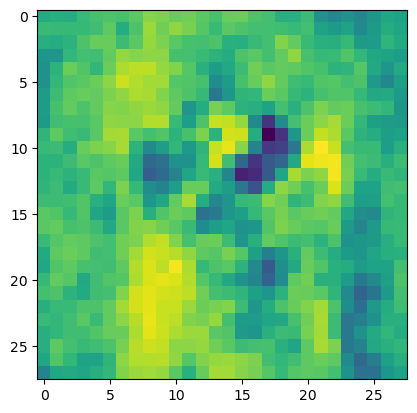

In [9]:
im = plt.imshow(images[0])

In [ ]:
X.shape

preprocessing the images

In [33]:
for i in range(0, len(X)) : 
    #im = plt.imshow(images[i])
    blur = cv.blur(images[i],(7,7))
    blur[i].reshape(i, 784)

ValueError: cannot reshape array of size 28 into shape (0,784)

In [36]:
def multi_convolver(image, kernel, iterations):
    for i in range(iterations):
        image = convolve2d(image, kernel, 'same', boundary = 'fill',
                           fillvalue = 0)
    return image
multi_convolver(images, gaussian, 2)

def convolver_rgb(image, kernel, iterations = 1):
    img_yuv = rgb2yuv(image)   
    img_yuv[:,:,0] = multi_convolver(img_yuv[:,:,0], kernel, 
                                     iterations)
    final_image = yuv2rgb(img_yuv)
                               
    fig, ax = plt.subplots(1,2, figsize = (17,10))
    
    ax[0].imshow(image)
    ax[0].set_title(f'Original', fontsize = 20)
    
    ax[1].imshow(final_image);
    ax[1].set_title(f'YUV Adjusted, Iterations = {iterations}', 
                    fontsize = 20)
    
    [axi.set_axis_off() for axi in ax.ravel()]
    
    fig.tight_layout()
    
    return final_image
final_image = convolver_rgb(images, sharpen, iterations = 1)

NameError: name 'gaussian' is not defined

In [15]:
X = blur

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [28, 10015]

In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
print('KNN Accuracy: %.3f' % accuracy_score(y_test,y_pred)) 